# Ejercicio Integrador - Clase 4

1) conseguir un dataset para regresion (pueden generar uno sintetico)

2) Armar codigo que permita generar multiples estimadores con diferentes muestras aleatorias de los datos.  (entrenar multiples modelos tomando muestras aleatorias diferentes de los datos y guardar en lista los parametros de cada uno)

3) Graficar todas las funciones (usar los parametros guardados en el punto 2 para poder hacer los graficos y comparar los diferentes resultados)"

In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
sys.path.append("..")
from utils.metrics import MSE, R2_lr
from utils.models import LinearRegression, LinearRegressionWithB
from utils.split import split_X_y

In [2]:
def estimate_with_random_split(X, y):
    mse = MSE()
    r_squared_lr = R2_lr()

    X_train, y_train, X_test, y_test = split_X_y(X, y, 0.8)

    ######## Linear Regression ########

    # Create linear regression object
    linear_regression = LinearRegression()

    # Train the model using the training sets
    linear_regression.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred = linear_regression.predict(X_test)
    lr_mse = mse(y_test, y_pred)
    lr_r2 = r_squared_lr(X_test, y_test, y_pred)

    ######## Linear Regression + B ########

    # Create linear regression object
    linear_regression_w_b = LinearRegressionWithB()

    # Train the model using the training sets
    linear_regression_w_b.fit(X_train, y_train)

    # Make predictions using the testing set
    y_pred_w_b = linear_regression_w_b.predict(X_test)
    lr_w_b_mse = mse(y_test, y_pred_w_b)
    lr_w_b_r2 = r_squared_lr(X_test, y_test, y_pred_w_b)

    parameters = {  
                    "lr_model": linear_regression.model,
                    "lr_w_b_model": linear_regression_w_b.model,
                    "X_test": X_test,
                    "y_test": y_test,
                    "y_pred": y_pred,
                    "y_pred_w_b": y_pred_w_b,
                    "metrics": {
                        "MSE para LR": lr_mse,
                        "MSE para LR + B": lr_w_b_mse,
                        "R2 para LR": lr_r2,
                        "R2 para LR + B": lr_w_b_r2,                        
                    }
    }
    return parameters

In [3]:
# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [4]:
# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

In [5]:
test_results = []
for i in range(9):
    res = estimate_with_random_split(diabetes_X, diabetes_y)
    test_results.append(res)

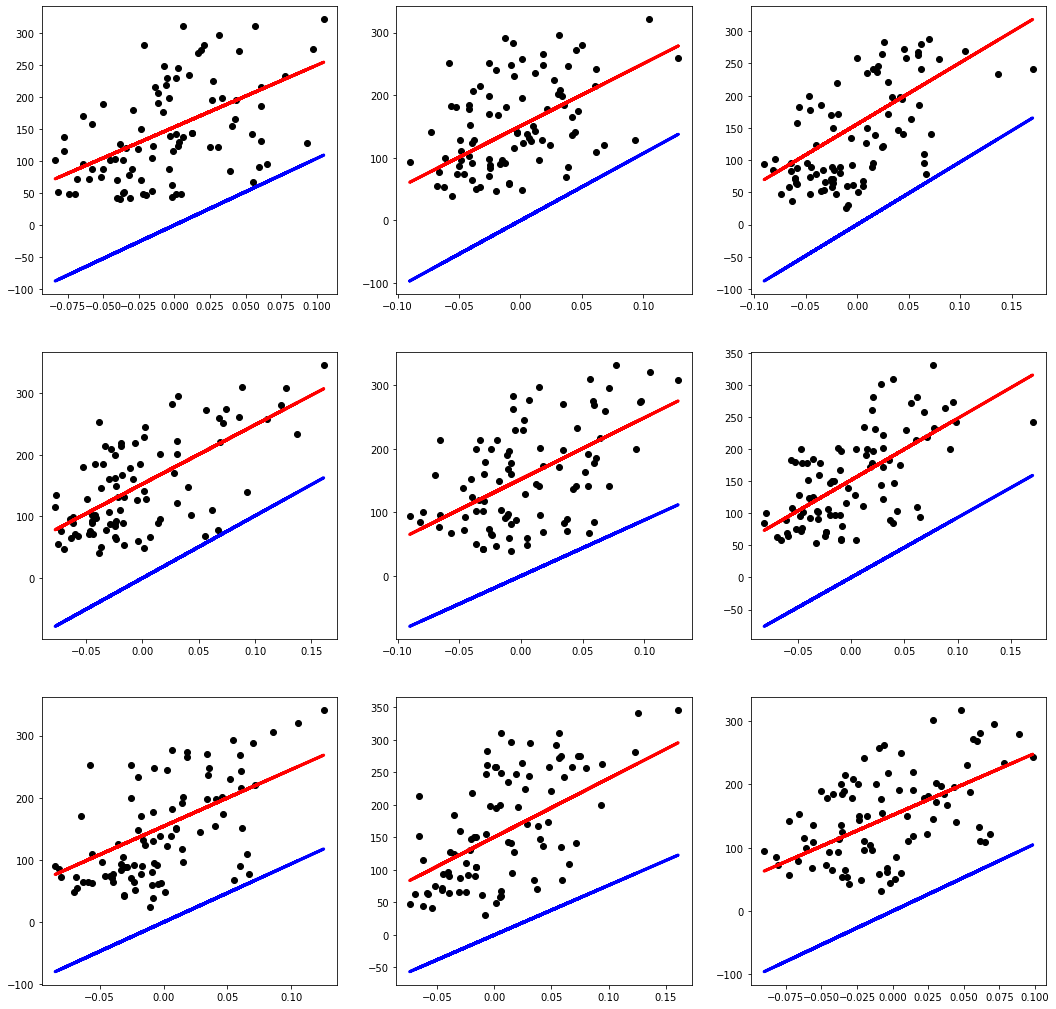

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(18,18))
counter = -1
for i in range(3):
    for j in range(3):
        # Plot outputs
        counter += 1
        res = test_results[counter]
        # print(res["X_test"])
        axs[i, j].scatter(res["X_test"], res["y_test"], color="black")
        axs[i, j].plot(res["X_test"], res["y_pred"], color="blue", linewidth=3)
        axs[i, j].plot(res["X_test"], res["y_pred_w_b"], color="red", linewidth=3)

plt.show()

In [7]:
import pandas as pd
pd.DataFrame([res["metrics"] for res in test_results])

,MSE para LR,MSE para LR + B,R2 para LR,R2 para LR + B
0,2.677803e+06,4533.136465,-454.328795,0.229194
1,2.856734e+06,4358.488915,-557.685012,0.147620
2,2.417236e+06,3982.683810,-413.857982,0.316472
3,2.790137e+06,3459.136690,-479.641632,0.404113
4,2.760650e+06,4522.676097,-442.419274,0.273562
5,2.694847e+06,3026.752076,-548.652754,0.382651
6,2.574574e+06,4162.210146,-399.808557,0.352029
7,3.029195e+06,4639.516407,-413.939218,0.364479
8,2.799935e+06,3790.337820,-560.291259,0.240167


# Conclusiones:
## El MSE da muchísimo más alto cuando usamos LR sin el término independiente, y R2 tiene valores negativos, indicando que el modelo es peor que la media. Podemos ver eso mismo en los gráficos dibujados más arriba.